In [1]:
import scripts
import os
import pandas as pd

# Paths
model_path = '../resources/models'
data_path = '../data'

2025-12-02 23:35:45.796397: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Import data and models

In [2]:
train_data, val_data, test_data = scripts.load_processed_data(data_path, 'over_under')

In [ ]:
mlp_model = scripts.MLPModel()
mlp_model.load_model(os.path.join(model_path, 'mlp_over_under_trained.keras'))

models = {
    'knn': None,
    'lin_reg': None,
    'tree': None
}

for model_name in models.keys():
    models[model_name] = scripts.load_model(os.path.join(model_path, f'{model_name}_over_under_trained.pkl'))

models = dict()
models['mlp'] = mlp_model

I0000 00:00:1764736557.177292   53634 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 913 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


# Evaluation

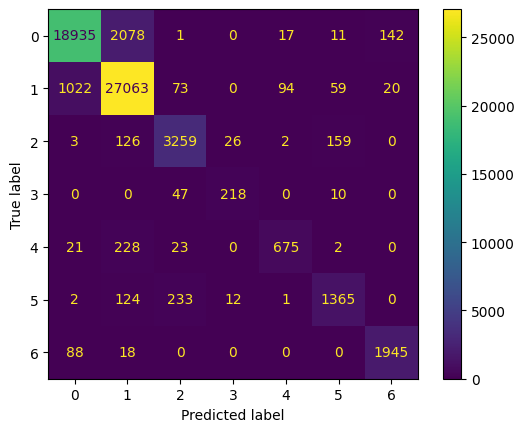

In [6]:
actuals = test_data['Cover_Type']
eval_path = '../resources/evaluations'

if not os.path.exists(eval_path):
    os.makedirs(eval_path)

for model_name, model in models.items():
    preds = model.predict(test_data.drop(columns=['Cover_Type']))
    conf, mcm, class_report, mcc = scripts.evaluate(actuals, preds)

    # Save evaluation results
    with open(f'{eval_path}/over_under_evaluations.txt', 'w') as f:
        f.write(f'Evaluations for {model_name} model:\n')
        f.write('Classification Report:\n')
        f.write(class_report)
        f.write(f'\nMatthews Correlation: {mcc}\n\n')

    # Save confusion matrix figure
    conf.plot()
    fig_path = f'{eval_path}/{model_name}_over_under_confusion_matrix.png'
    conf.figure_.savefig(fig_path)